<a href="https://colab.research.google.com/github/delademf/malaria_classification_CNN/blob/main/Malaria_detection_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install tensorflow

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential  # Fix: Added 'models'
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPool2D, ZeroPadding2D, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
!git clone https://github.com/laxmimerit/Malaria-Classification-Using-CNN.git

Cloning into 'Malaria-Classification-Using-CNN'...
remote: Enumerating objects: 27577, done.
remote: Total 27577 (delta 0), reused 0 (delta 0), pack-reused 27577
Receiving objects: 100% (27577/27577), 331.67 MiB | 31.96 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Updating files: 100% (27562/27562), done.


In [5]:
img_width =64
img_height =64

In [6]:
datagen = ImageDataGenerator(rescale=1/255.0,validation_split=0.2)

In [7]:
train_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN',
                                                   target_size=(img_width,img_height),
                                                   class_mode='binary',
                                                   batch_size =16,
                                                   subset = 'training'
                                                   )

Found 22047 images belonging to 2 classes.


In [8]:
validation_data_generator = datagen.flow_from_directory(directory='/content/Malaria-Classification-Using-CNN',
                                                   target_size=(img_width,img_height),
                                                   class_mode='binary',
                                                   batch_size =16,
                                                   subset = 'validation'
                                                   )

Found 5511 images belonging to 2 classes.


**CNN Model**

In [9]:
model = Sequential()

model.add(Conv2D(16,(3,3), input_shape = (img_width,img_height,3), activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(64,activation= 'relu'))
model.add(Dropout(0.5))

model.add(Dense(1,activation='sigmoid'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 31, 31, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 14, 14, 32)        0

**Compiled model**

In [11]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

**Model Training**

In [12]:
history = model.fit_generator(generator=train_data_generator,
                              steps_per_epoch= len(train_data_generator),
                              epochs =5,
                              validation_data = validation_data_generator,
                              validation_steps = len(validation_data_generator)
                              )

<ipython-input-12-8df9404fb93b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_data_generator,


Epoch 1/5
1378/1378 [==============================] - 142s 100ms/step - loss: 4.1042e-04 - accuracy: 0.9998 - val_loss: 2.0319e-13 - val_accuracy: 1.0000
Epoch 2/5
1378/1378 [==============================] - 123s 90ms/step - loss: 1.8826e-08 - accuracy: 1.0000 - val_loss: 1.3537e-13 - val_accuracy: 1.0000
Epoch 3/5
1378/1378 [==============================] - 131s 95ms/step - loss: 1.5817e-08 - accuracy: 1.0000 - val_loss: 4.4327e-14 - val_accuracy: 1.0000
Epoch 4/5
1378/1378 [==============================] - 121s 88ms/step - loss: 3.1765e-09 - accuracy: 1.0000 - val_loss: 2.0278e-14 - val_accuracy: 1.0000
Epoch 5/5
1378/1378 [==============================] - 133s 97ms/step - loss: 1.6509e-10 - accuracy: 1.0000 - val_loss: 1.8081e-14 - val_accuracy: 1.0000


In [13]:
history.history

{'loss': [0.000410423701396212,
  1.882560241028841e-08,
  1.5816674192592473e-08,
  3.1765217123336242e-09,
  1.6508892863864588e-10],
 'accuracy': [0.9998185634613037, 1.0, 1.0, 1.0, 1.0],
 'val_loss': [2.0319095256175757e-13,
  1.3537382206971899e-13,
  4.432694513637099e-14,
  2.0278000944519946e-14,
  1.808078562088103e-14],
 'val_accuracy': [1.0, 1.0, 1.0, 1.0, 1.0]}

In [14]:
def plot_learningCurve(history,epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1,epoch+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train','val'],loc ='upper left')
  plt.show()

# Plot training & validation loss values
  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train','val'],loc ='upper left')
  plt.show()

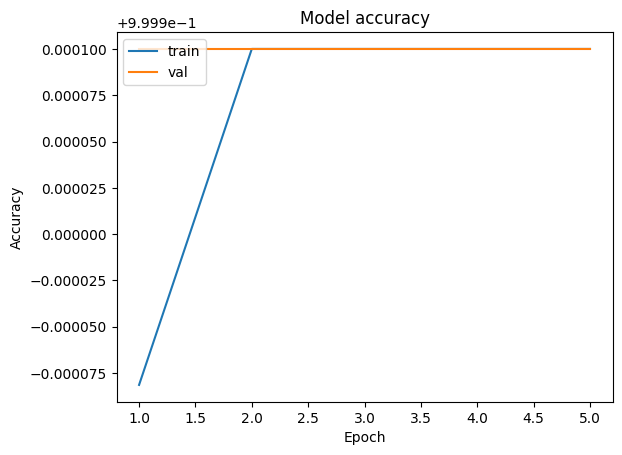

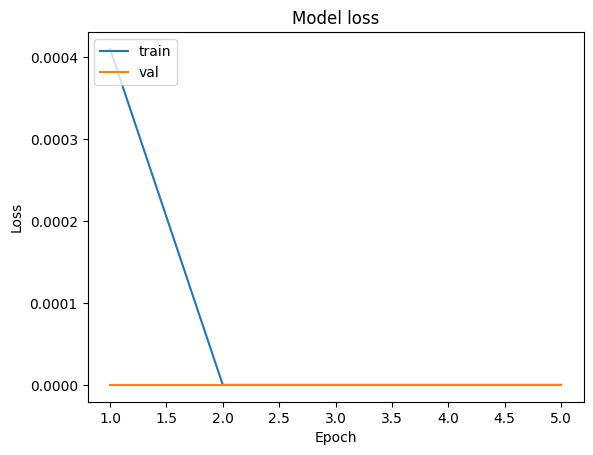

In [15]:
plot_learningCurve(history,5)

**Detection**

In [31]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

# 1. Preprocess the new image
def preprocess_image(image_path):
    img = cv2.imread('/content/Malaria-Classification-Using-CNN/malaria-dataset/Parasitized/C116P77ThinF_IMG_20150930_171809_cell_81.png')
    img = cv2.resize(img, (224, 224))
    img = img / 255.0  # Normalize pixel values
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

# 2. Load the trained model
model = load_model("/content/model.h5")

# 3. Make predictions
new_image_path = "/content/Malaria-Classification-Using-CNN/malaria-dataset/Parasitized/C116P77ThinF_IMG_20150930_171809_cell_81.png"
new_image = preprocess_image(new_image_path)
prediction = model.predict(new_image)

# Assuming binary classification (infected or uninfected)
threshold = 0.5
result = "Infected" if prediction > threshold else "Uninfected"

print(f"The image is classified as: {result}")


1/1 [==============================] - 1s 1s/step
The image is classified as: Uninfected
